In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# STATISTICAL SUMMARY

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


 **DATA HAS VERY LESS MISSING VALUES, SO WE WILL DROP THOSE.**

In [ ]:
data.dropna(inplace=True)

<Axes: >

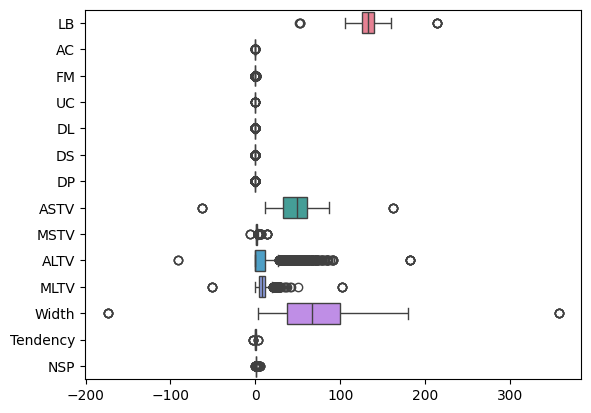

In [ ]:
sns.boxplot( data = data, orient='h')

**THERE ARE SOME OUTLIERS WHICH CAN RESULT IN SKEWNESS.**

In [ ]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


***MEAN > MEDIAN = POSITIVE SKEWNESS***

 ***MEAN < MEDIAN = NEGATIVE SKEWNESS***

In [ ]:
data.skew()

LB          0.320747
AC          1.864886
FM          6.718356
UC          0.977332
DL          2.011970
DS          8.418984
DP          6.422466
ASTV        0.055370
MSTV        4.175994
ALTV        2.968950
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

<Axes: >

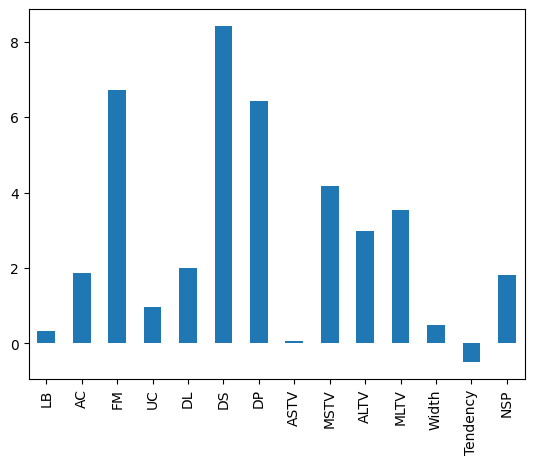

In [ ]:
data.skew().plot(kind='bar')

 COLUMNS WHICH HAVE VERY HIGH SKEWNESS:


 *   FM
 *   DS
 *   DP
 *   MSTV
 *   MLTV








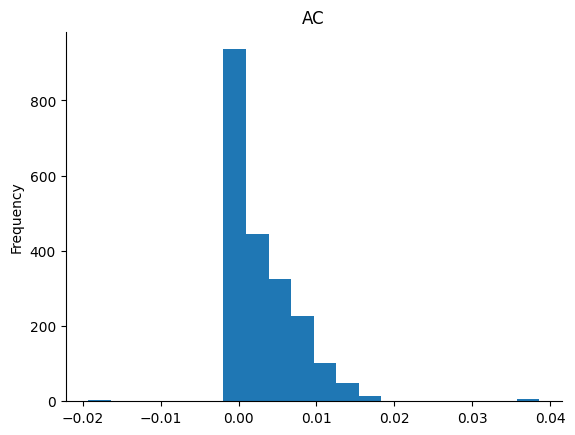

In [ ]:
data['AC'].plot(kind='hist', bins=20, title='AC')
plt.gca().spines[['top', 'right',]].set_visible(False)

 **WE CAN THERE ARE FEW VERY EXTREME VALUES, WE SHOULD TREAT THEM.**

In [ ]:
percentile25 = data['AC'].quantile(0.25)
percentile75 = data['AC'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = data.copy()

new_data['AC'] = np.where(
    new_data['AC'] > upper_limit,
    upper_limit,
    np.where(
        new_data['AC'] < lower_limit,
        lower_limit,
        new_data['AC']
    )
)

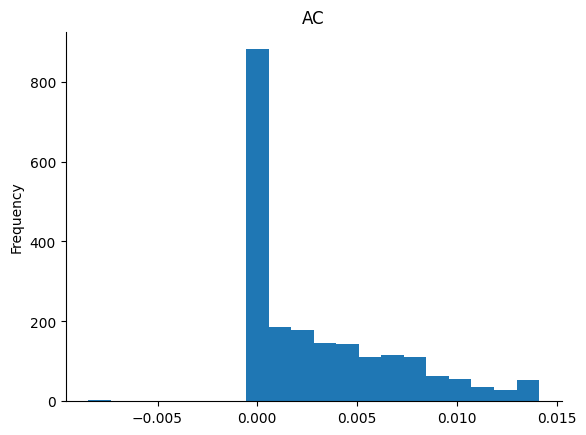

In [ ]:
new_data['AC'].plot(kind='hist', bins=20, title='AC')
plt.gca().spines[['top', 'right',]].set_visible(False)

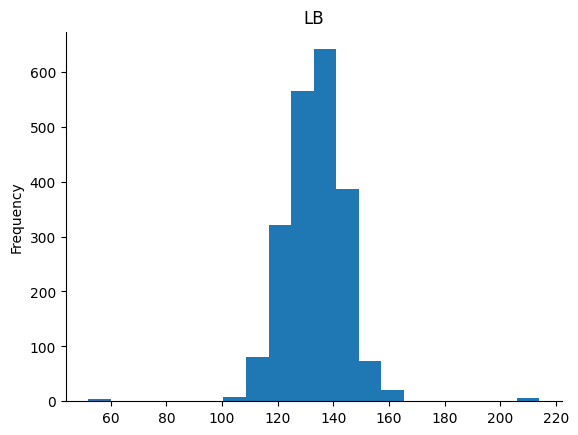

In [ ]:
data['LB'].plot(kind='hist', bins=20, title='LB')
plt.gca().spines[['top', 'right',]].set_visible(False)

 **SO 95% DATA OF LB RANGES FROM 110 TO 155**

 *(MEAN - 2 × STD) TO (MEAN + 2 × STD)*

In [ ]:
percentile25 = data['LB'].quantile(0.25)
percentile75 = data['LB'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['LB'] = np.where(
    new_data['LB'] > upper_limit,
    upper_limit,
    np.where(
        new_data['LB'] < lower_limit,
        lower_limit,
        new_data['LB']
    )
)

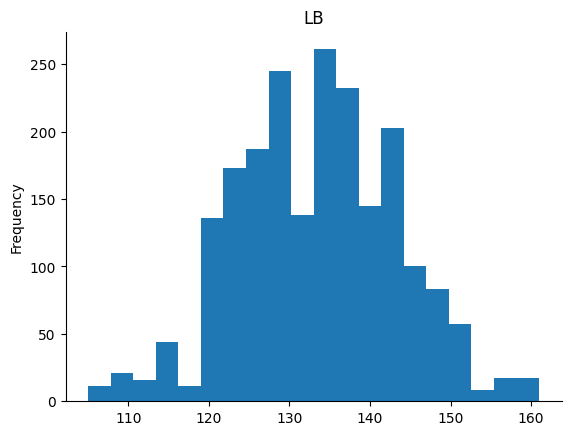

In [ ]:
new_data['LB'].plot(kind='hist', bins=20, title='LB')
plt.gca().spines[['top', 'right',]].set_visible(False)

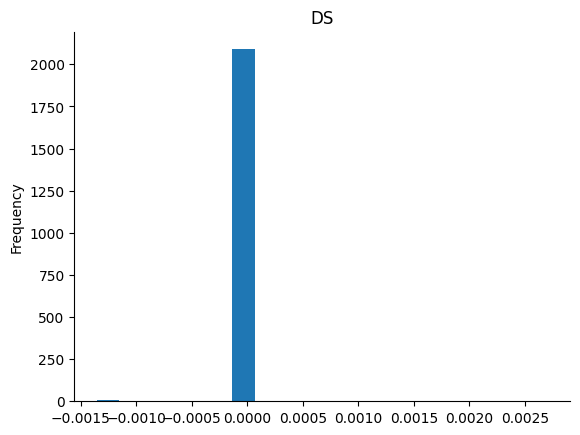

In [ ]:
new_data['DS'].plot(kind='hist', bins=20, title='DS')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
percentile25 = data['LB'].quantile(0.25)
percentile75 = data['LB'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['LB'] = np.where(
    new_data['LB'] > upper_limit,
    upper_limit,
    np.where(
        new_data['LB'] < lower_limit,
        lower_limit,
        new_data['LB']
    )
)

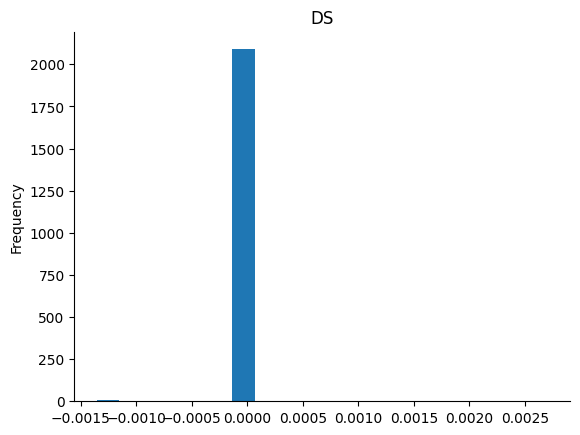

In [ ]:
new_data['DS'].plot(kind='hist', bins=20, title='DS')
plt.gca().spines[['top', 'right',]].set_visible(False)

 **THERE IS STILL HIGH SKEWNESS, NOW WE WILL LOG TRANSFORM IT.**

In [ ]:
#new_data['DS'] = np.log(new_data['DS'] + 1)
#new_data['DS'].plot(kind='hist', bins=20, title='DS')
#plt.gca().spines[['top', 'right',]].set_visible(False)


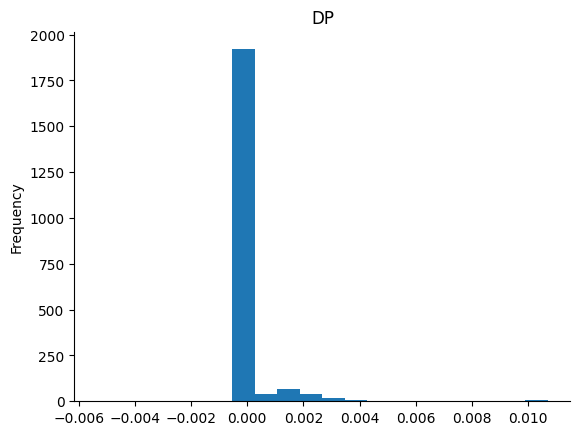

In [ ]:
new_data['DP'].plot(kind='hist', bins=20, title='DP')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
percentile25 = data['DP'].quantile(0.25)
percentile75 = data['DP'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['DP'] = np.where(
    new_data['DP'] > upper_limit,
    upper_limit,
    np.where(
        new_data['DP'] < lower_limit,
        lower_limit,
        new_data['DP']
    )
)

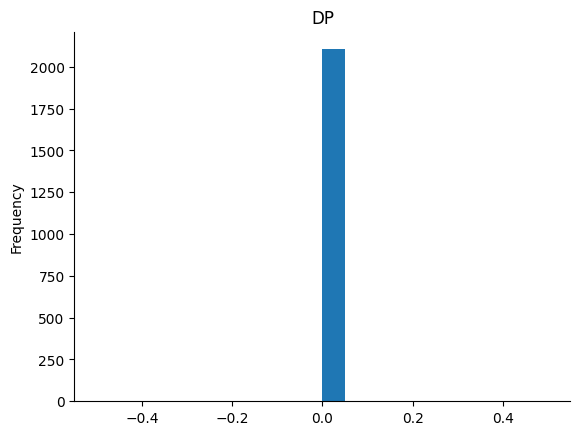

In [ ]:
new_data['DP'].plot(kind='hist', bins=20, title='DP')
plt.gca().spines[['top', 'right',]].set_visible(False)

 **SO 95% DATA OF DP RANGES FROM 0.00007 TO 0.0018**

 *(MEAN - 2 × STD) TO (MEAN + 2 × STD)*

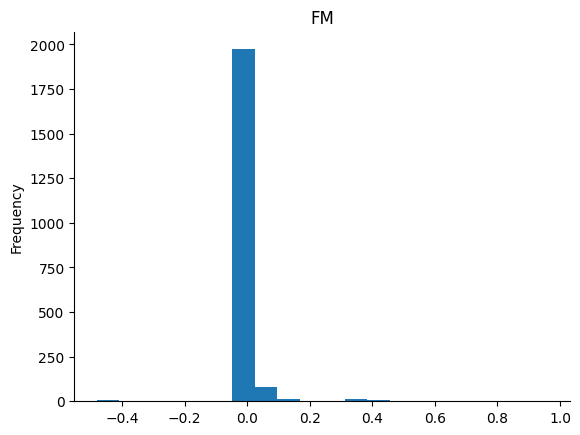

In [ ]:
new_data['FM'].plot(kind='hist', bins=20, title='FM')
plt.gca().spines[['top', 'right',]].set_visible(False)

 **SO 95% DATA OF FM RANGES FROM -0.125 TO 0.145**

 *(MEAN - 2 × STD) TO (MEAN + 2 × STD)*


In [ ]:
percentile25 = data['FM'].quantile(0.25)
percentile75 = data['FM'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['FM'] = np.where(
    new_data['FM'] > upper_limit,
    upper_limit,
    np.where(
        new_data['FM'] < lower_limit,
        lower_limit,
        new_data['FM']
    )
)

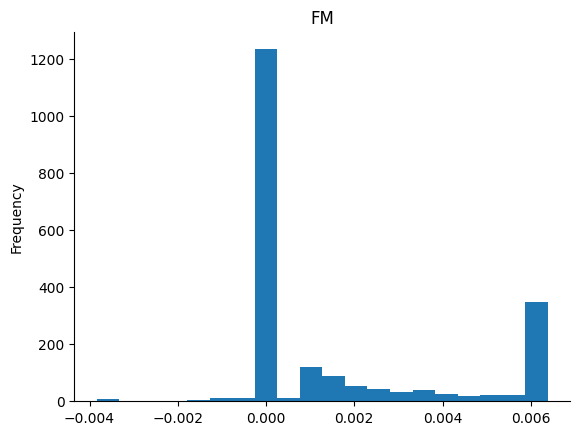

In [ ]:
new_data['FM'].plot(kind='hist', bins=20, title='FM')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
new_data.skew()

LB          0.017579
AC          1.057358
FM          1.128849
UC          0.977332
DL          2.011970
DS          8.418984
DP          0.000000
ASTV        0.055370
MSTV        4.175994
ALTV        2.968950
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

**EVEN AFTER TREATING THE OUTLIERS, THERE IS NO DIFFERENCE IN SKEWNESS. SO WE CAN SAY THAT THEY ARE NOT OUTLIERS.**

# DATA VISUALISATION

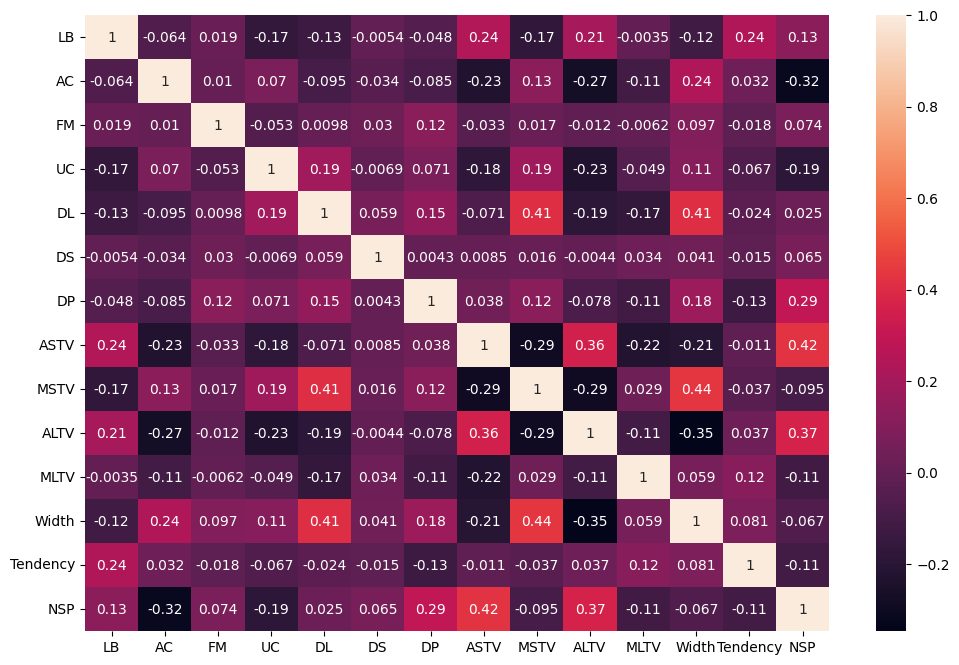

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**COLUMNS HAVE POSITIVE CORRELARION BETWEEN THEM:**


*  NSP - ASTV
*   WIDTH - DL
*   WIDTH - MSTV
*   MSTV - DL





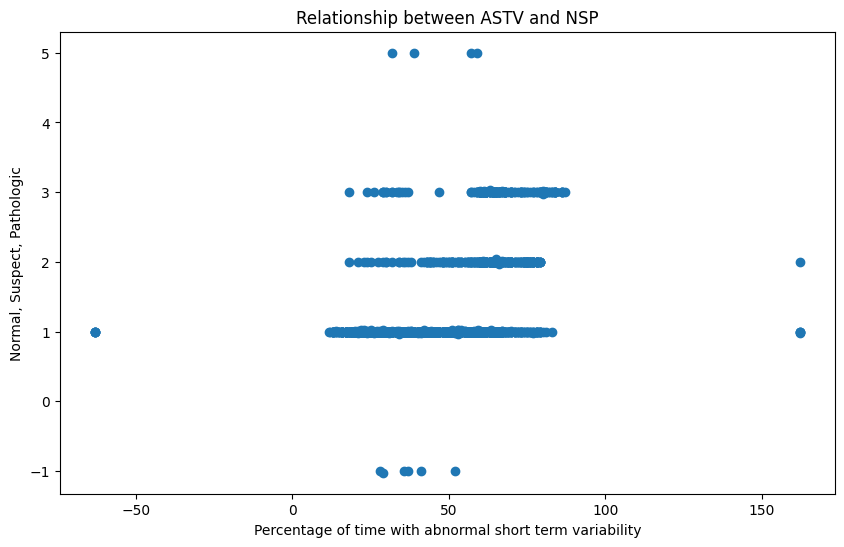

In [ ]:
# This plot shows the relationship between ASTV and NSP.
# To understand the relationship properly, we need to add labels, title and context.
plt.figure(figsize=(10, 6))
plt.scatter(data['ASTV'], data['NSP'])
plt.xlabel("Percentage of time with abnormal short term variability")
plt.ylabel("Normal, Suspect, Pathologic")
plt.title("Relationship between ASTV and NSP")
plt.show()


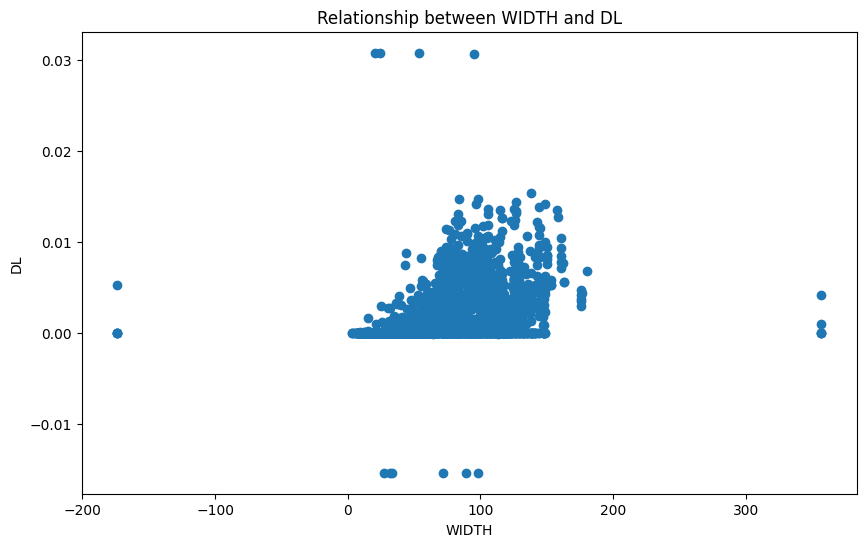

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Width'], data['DL'])
plt.xlabel("WIDTH")
plt.ylabel("DL")
plt.title("Relationship between WIDTH and DL")
plt.show()

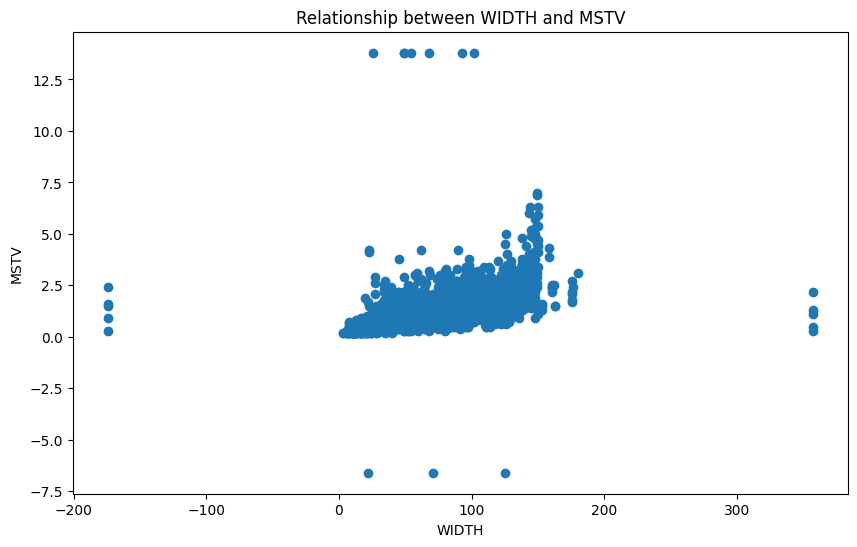

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Width'], data['MSTV'])
plt.xlabel("WIDTH")
plt.ylabel("MSTV")
plt.title("Relationship between WIDTH and MSTV")
plt.show()

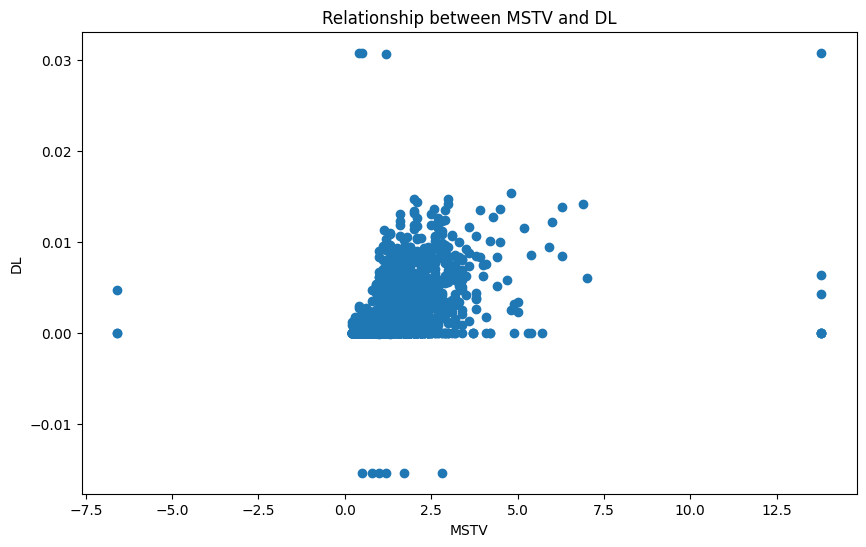

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(data['MSTV'], data['DL'])
plt.xlabel("MSTV")
plt.ylabel("DL")
plt.title("Relationship between MSTV and DL")
plt.show()

# CONCLUSION

**1. Data Overview**
* There are 2126 entries in the dataset.
* Most columns have 2105 or 2126 non-null values, indicating a small number of missing values in some columns.
* The data types are primarily float64, which is appropriate for numerical measurements.
* Class 1 (normal) is the dominant class with 1546 instances.
* Class 2 (suspect) has 280 instances.
* Class 3 (pathologic) has 164 instances.
* There are a few instances with other values, which might be data entry errors or outliers.

**2. Correlation Heatmap**

The correlation heatmap reveals:
* Strong positive correlation between LB (FHR baseline) and Width.
* Moderate positive correlation between ASTV and MSTV.
* Moderate negative correlation between LB and ASTV.
* Most other features have weak to moderate correlations.

**3. Key Insights And Impact On Decision Making**
Key Insights and Impact on Decision-Making:

* The significant imbalance in the NSP classes (normal, suspect, pathologic) will impact any predictive modeling. Techniques like oversampling, undersampling, or using class weights may be necessary to ensure balanced predictions.

* The presence of numerous outliers in several features necessitates careful consideration. These could represent important rare cases in medical data, so removing them might not be advisable.

* The pairplot reveals non-linear relationships between some features and the target variable. This suggests that non-linear models (e.g., decision trees, random forests, or neural networks) might be more appropriate than linear models for predictive tasks.

* While there are few missing values, the presence of unexpected values in the NSP column (e.g., -1, 5, and some float values) indicates a need for data cleaning.


* Given the imbalanced nature of the data, stratified sampling should be used in cross-validation to ensure each fold has a representative distribution of the different classes.


